# Exploratory Data Analysis

* By. Gukhwan Hyun

* About Datasets

Sales analytics is the practice of generating insights from sales data, trends, and metrics to set targets and forecast future sales performance. Sales analysis is mining your data to evaluate the performance of your sales team against its goals. It provides insights about the top performing and underperforming products/services, the problems in selling and market opportunities, sales forecasting, and sales activities that generate revenue. [link](https://www.kaggle.com/knightbearr/sales-product-data)

# Import dataset from Kaggle

In [1]:
! pip install kaggle
! mkdir ~/.kaggle    
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download knightbearr/sales-product-data
! unzip sales-product-data.zip

  0% 0.00/2.39M [00:00<?, ?B/s]
100% 2.39M/2.39M [00:00<00:00, 79.7MB/s]
Archive:  sales-product-data.zip
  inflating: Sales_April_2019.csv    
  inflating: Sales_August_2019.csv   
  inflating: Sales_December_2019.csv  
  inflating: Sales_February_2019.csv  
  inflating: Sales_January_2019.csv  
  inflating: Sales_July_2019.csv     
  inflating: Sales_June_2019.csv     
  inflating: Sales_March_2019.csv    
  inflating: Sales_May_2019.csv      
  inflating: Sales_November_2019.csv  
  inflating: Sales_October_2019.csv  
  inflating: Sales_September_2019.csv  


# Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno
import plotly.express as px
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# Load the dataset

In [3]:
def create_dataset(MONTHS):
  for ix, m in enumerate(MONTHS):
    m = pd.read_csv(f'/content/Sales_{m}_2019.csv')
    if ix == 0:
      n = m
    elif ix == 1:
      dataset = pd.concat([n, m], axis=0, ignore_index=True)
    else:
      dataset = pd.concat([dataset, m], axis=0, ignore_index=True)
      
  return dataset

In [4]:
MONTHS = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
          'September', 'October', 'November', 'December']

dataset = create_dataset(MONTHS)
dataset

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


# Preprocessing

In [5]:
sales = dataset.copy()

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


## Missing values

In [7]:
sales.dropna(inplace=True)
sales = sales.reset_index()
len(sales)

186305

## Wrong values

In [8]:
wrongdata = sales[sales['Price Each'] == 'Price Each'].index
sales.drop(index=wrongdata, inplace=True)
sales = sales.reset_index()
len(sales)

185950

## Data type conversion
  * Price : float

In [9]:
sales['Price Each'] = sales['Price Each'].astype(float)
sales['Quantity Ordered'] = sales['Quantity Ordered'].astype(int)
print(sales['Price Each'].dtype)
print(sales['Quantity Ordered'].dtype)

float64
int64


## Feature Engineering

In [10]:
sales['Total Earning'] = sales['Price Each'] * sales['Quantity Ordered']
sales['Total Earning'].head(5)

0    700.00
1     14.95
2     23.98
3    149.99
4     11.99
Name: Total Earning, dtype: float64

## Parsing

### datetime
 * 12/21/19 21:45

In [11]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'].str.strip(), format="%m/%d/%y %H:%M")

In [12]:
sales['Order Year'] = sales['Order Date'].dt.year
sales['Order Month'] = sales['Order Date'].dt.month
sales['Order Day'] = sales['Order Date'].dt.day
sales['Order Hour'] = sales['Order Date'].dt.hour
# sales['Order Minute'] = sales['Order Date'].dt.minute

### address
  * 944 Walnut St, Boston, MA 02215
  * regular expression

In [13]:
city = []
state = []
for x in sales['Purchase Address'].str.split(", | "):
  if x[-4] == 'St':
    city.append(x[-3])
    state.append(x[-2])
  else:
    state.append(x[-2])
    x = x[-4:-2]
    cityname = ' '.join(x)
    city.append(cityname)

  

# print(city, state, sep='\n')

In [14]:
city_state = {'city': city, 'state': state}
city_state_df = pd.DataFrame(city_state)
city_state_df

,city,state
0,Boston,MA
1,Portland,OR
2,San Francisco,CA
3,Los Angeles,CA
4,Austin,TX
...,...,...
185945,San Francisco,CA
185946,Los Angeles,CA
185947,Seattle,WA
185948,Dallas,TX


In [15]:
city_state_df['city'].value_counts()

San Francisco    44732
Los Angeles      29605
York City        24876
Boston           19934
Atlanta          14881
Dallas           14820
Seattle          14732
Portland         12465
Austin            9905
Name: city, dtype: int64

In [16]:
eda = pd.concat([sales,city_state_df], axis=1)
eda = eda.drop(columns=['level_0', 'index'])
eda

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Earning,Order Year,Order Month,Order Day,Order Hour,city,state
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,2019,1,22,21,Boston,MA
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,2019,1,28,14,Portland,OR
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,2019,1,17,13,San Francisco,CA
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,2019,1,5,20,Los Angeles,CA
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,2019,1,25,11,Austin,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,2019,12,11,20,San Francisco,CA
185946,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,2019,12,1,12,Los Angeles,CA
185947,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,2019,12,9,6,Seattle,WA
185948,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,2019,12,3,10,Dallas,TX


# EDA
  [reference](https://www.kaggle.com/sonalisheth/in-depth-analysis-on-sales-dataset)

  [reference](https://www.kaggle.com/knightbearr/sales-data-deep-analysis-knightbearr)

In [17]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Total Earning     185950 non-null  float64       
 7   Order Year        185950 non-null  int64         
 8   Order Month       185950 non-null  int64         
 9   Order Day         185950 non-null  int64         
 10  Order Hour        185950 non-null  int64         
 11  city              185950 non-null  object        
 12  state             185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memor

In [18]:
eda.describe()

,Quantity Ordered,Price Each,Total Earning,Order Year,Order Month,Order Day,Order Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,185.490917,2019.000183,7.059140,15.759532,14.413305
std,0.442793,332.731330,332.919771,0.013521,3.502996,8.782176,5.423416
min,1.000000,2.990000,2.990000,2019.000000,1.000000,1.000000,0.000000
25%,1.000000,11.950000,11.950000,2019.000000,4.000000,8.000000,11.000000
50%,1.000000,14.950000,14.950000,2019.000000,7.000000,16.000000,15.000000
75%,1.000000,150.000000,150.000000,2019.000000,10.000000,23.000000,19.000000
max,9.000000,1700.000000,3400.000000,2020.000000,12.000000,31.000000,23.000000


## Distribution Plots, Quantile-Qunatile (Q-Q) Plots

[link](https://rudolf-2434.tistory.com/9)

[link](https://mizykk.tistory.com/44)

데이터의 정규성을 검증 (데이터셋의 분포가 정규분포를 따르는지 검정하는 것을 말한다. 데이터셋이 정규분포를 따라야, 다양한 분석 이론을 적용시킬 수 있다)

distplot으로 그래프를 그렸을 때, 종모양의 정규분포을 띄어야 정규성을 만족한다.

qqplot에서 빨간선에 가까울 수록 정규성을 만족한다. 

In [ ]:
eda.columns

In [ ]:
# checking and visualizing the type of distribution of a feature column
def normality_test(data, color, title1, title2):
    
  fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15, 7))

  sns.histplot(data, ax=ax1, kde=True, color=color)
  ax1.set(title=title1) # set the title 1
  
  qqplot(data, ax=ax2, line='s')
  ax2.set(title=title2) # set the title 2

#### Quantity Ordered Data

In [ ]:
normality_test(
    data=eda['Quantity Ordered'],
    color='red', 
    title1='Quantity Ordered Data Distribution', 
    title2='Quantile Plot')

### Order Month Data

In [ ]:
times = ['Order Year', 'Order Month','Order Day', 'Order Hour']

for time in times:
  normality_test(
      data=eda[time],
      color='red', 
      title1=time + 'Data Distribution', 
      title2='Quantile Plot')

In [ ]:
eda.corr()

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(eda.corr(), annot=True, cmap="YlGnBu")
plt.show()

## What was the best Year for sales? How much was earned that Year?

2019년

In [20]:
eda.groupby('Order Year')['Total Earning'].sum().sort_values(ascending=False)

Order Year
2019    3.448337e+07
2020    8.670290e+03
Name: Total Earning, dtype: float64

## What was the best month for sales? How much was earned that month?

12월 $4,613,443

In [21]:
eda.groupby('Order Month')['Total Earning'].sum().sort_values(ascending=False)

Order Month
12    4.613443e+06
10    3.736727e+06
4     3.390670e+06
11    3.199603e+06
5     3.152607e+06
3     2.807100e+06
7     2.647776e+06
6     2.577802e+06
8     2.244468e+06
2     2.202022e+06
9     2.097560e+06
1     1.822257e+06
Name: Total Earning, dtype: float64

In [33]:
eda.groupby(['Order Year', 'Order Month'])['Total Earning'].sum().sort_values(ascending=False)

Order Year  Order Month
2019        12             4.613443e+06
            10             3.736727e+06
            4              3.390670e+06
            11             3.199603e+06
            5              3.152607e+06
            3              2.807100e+06
            7              2.647776e+06
            6              2.577802e+06
            8              2.244468e+06
            2              2.202022e+06
            9              2.097560e+06
            1              1.813586e+06
2020        1              8.670290e+03
Name: Total Earning, dtype: float64

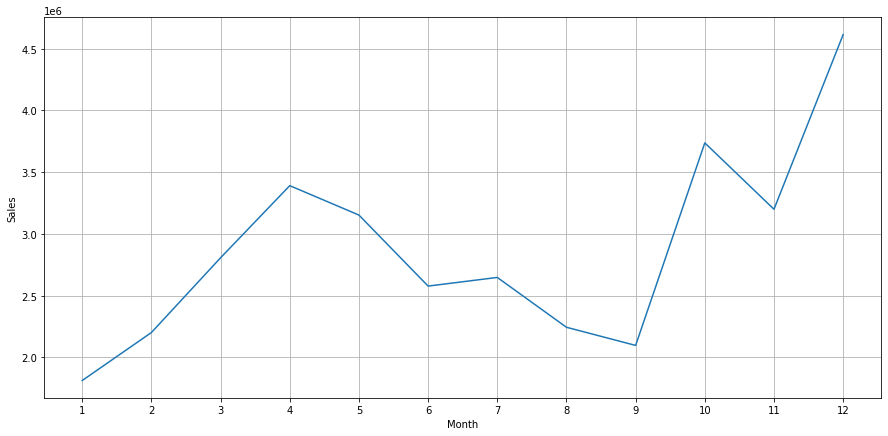

In [43]:
sales_19 = eda[eda['Order Year'] == 2019].groupby('Order Month')['Total Earning'].sum().sort_index()

plt.figure(figsize=(15,7))
plt.plot(sales_19.index, sales_19.values)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(sales_19.index)
plt.grid()
plt.show()

## What City had the highest number of sales?

샌프란시스코

In [22]:
eda.groupby('city')['Total Earning'].count().sort_values(ascending=False)

city
San Francisco    44732
Los Angeles      29605
York City        24876
Boston           19934
Atlanta          14881
Dallas           14820
Seattle          14732
Portland         12465
Austin            9905
Name: Total Earning, dtype: int64

## What time should we display adverstisement to maximize likelihood of customer's buying product?


In [23]:
eda.groupby('Order Hour')['Total Earning'].count().sort_values(ascending=False).head(5)

Order Hour
19    12905
12    12587
11    12411
18    12280
20    12228
Name: Total Earning, dtype: int64

판매량이 상승하기 1~2시간전에 광고하는 것이 좋아보임
  * 1번쨰 광고 -> 9시
  * 2번째 광고 -> 15시

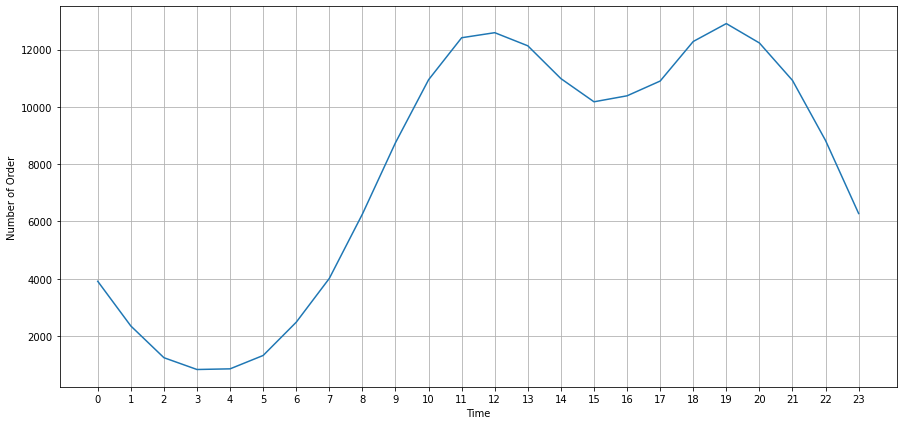

In [24]:
adtime = eda.groupby('Order Hour')['Total Earning'].count().sort_index()

plt.figure(figsize=(15,7))
plt.plot(adtime.index, adtime.values)
plt.xlabel('Time')
plt.ylabel('Number of Order')
plt.xticks(adtime.index)
plt.grid()
plt.show()

## What products are most often sold together?

In [25]:
from itertools import combinations
from collections import Counter

# drop it using duplicated() funct
data = eda[eda['Order ID'].duplicated(keep=False)]
# create a new column
data['Grouped'] = eda.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# let's make a new variable
data = data[['Order ID', 'Grouped']].drop_duplicates()
# create a new variable for Counter
count = Counter()
# make a for loop
for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
# and make another for loop    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## What product sold the most? Why do you think it sold the most?

C타입, 라이트닝 충전 케이블 --> 안드로이드, 애플 유저들이 많으므로

배터리 --> 많은 전자제품의 소모품

In [26]:
eda['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

# Probability


Probability Frequency Distribution [link](https://www.statisticshowto.com/probability-and-statistics/probability-main-index/probability-frequency-distribution/)
* A probability frequency distribution is a way to show how often an event will happen. 
* It also shows what the probability of each event happening is
$$
\frac{Frequency\space of\space Item} {Total\space Frequency}
$$

In [27]:
def pfd(freq, totalfreq):
  return freq / totalfreq

In [28]:
total_frequency = eda['Product'].value_counts().sum()

## How much probability for next people will ordered USB-C Charging Cable?

In [29]:
c_cable = eda[eda['Product'] == 'USB-C Charging Cable'].value_counts().sum()
percent = pfd(c_cable,total_frequency) * 100

print('Probability to order USB-C Charging Cable is %.1f' % (percent), '%') 

Probability to order USB-C Charging Cable is 11.8 %


## How much probability for next people will ordered iPhone?

In [30]:
iPhone = eda[eda['Product'] == 'iPhone'].value_counts().sum()
percent = pfd(iPhone,total_frequency) * 100

print('Probability to order iPhone is %.1f' % (percent), '%') 

Probability to order iPhone is 3.7 %


## How much probability for next people will ordered Google Phone?


In [31]:
Google_Phone = eda[eda['Product'] == 'Google Phone'].value_counts().sum()
percent = pfd(Google_Phone,total_frequency) * 100

print('Probability to order Google Phone is %.1f' % (percent), '%') 

Probability to order Google Phone is 3.0 %


## How much probability other peoples will ordered Wired Headphones?

In [32]:
Wired_Headphones = eda[eda['Product'] == 'Wired Headphones'].value_counts().sum()
percent = pfd(Wired_Headphones,total_frequency) * 100

print('Probability to order Wired Headphones is %.1f' % (percent), '%') 

Probability to order Wired Headphones is 10.2 %
